In [7]:
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import os

CP = pd.read_csv("../data/CellPainting/CellPainting_processed.csv.gz", compression="gzip")
CP = CP.groupby("Standardized_SMILES").median().reset_index()
CP = CP.loc[:, CP.nunique() != 1]
CP

,Standardized_SMILES,Cells_AreaShape_Area,Cells_AreaShape_Center_X,Cells_AreaShape_Center_Y,Cells_AreaShape_Compactness,Cells_AreaShape_Eccentricity,Cells_AreaShape_Extent,Cells_AreaShape_FormFactor,Cells_AreaShape_MajorAxisLength,Cells_AreaShape_MaxFeretDiameter,...,Nuclei_Texture_Variance_DNA_5_0,Nuclei_Texture_Variance_ER_10_0,Nuclei_Texture_Variance_ER_3_0,Nuclei_Texture_Variance_ER_5_0,Nuclei_Texture_Variance_Mito_10_0,Nuclei_Texture_Variance_Mito_3_0,Nuclei_Texture_Variance_Mito_5_0,Nuclei_Texture_Variance_RNA_10_0,Nuclei_Texture_Variance_RNA_3_0,Nuclei_Texture_Variance_RNA_5_0
0,Brc1c(Br)c(Br)c2[n-]nnc2c1Br,99.679688,-1.738281,11.632812,-0.012594,-0.002082,0.009814,0.011497,0.564582,0.658103,...,0.206057,0.027947,0.060647,0.024703,0.030289,0.070795,0.070235,-0.026796,0.007465,-0.005555
1,Brc1c(CSc2nc3ccccc3s2)nc2ncccn12,-196.503906,14.769531,13.367188,0.022452,0.012719,-0.011546,-0.018795,-2.328398,-1.292827,...,-0.271055,0.064555,-0.006663,0.037034,-0.029089,-0.032247,-0.005805,-0.264220,-0.203184,-0.218126
2,Brc1c(NC2=[NH+]CCN2)ccc2nccnc12,210.992188,8.984375,-6.285156,0.031261,0.015688,-0.005825,0.004874,5.293129,5.205991,...,-0.077125,-0.059831,-0.055991,-0.029520,-0.075991,-0.097967,-0.104842,0.173642,0.103963,0.125708
3,Brc1cc(Br)c2nc(-c3cccs3)ccc2c1,-250.296875,14.230469,15.363281,-0.000253,0.007498,0.005429,0.015187,-3.786010,-4.546036,...,-0.127135,0.036756,-0.078057,-0.067460,-0.002717,-0.012557,0.007323,-0.004406,-0.023417,0.001108
4,Brc1ccc(-c2csc(-c3c[nH]c4ccccc34)n2)cc1,-107.328125,-29.937500,-18.109375,0.027426,0.011474,-0.007506,-0.000948,-0.916672,-0.910823,...,-0.136322,-0.033263,-0.056687,-0.076265,-0.152171,-0.214522,-0.195204,-0.048332,-0.066457,-0.059352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15401,c1csc(C2[NH2+]c3ccccc3-c3nc4ccccc4n32)c1,221.800781,-9.074219,1.730469,0.013775,0.006944,-0.001901,-0.003494,4.193896,5.247310,...,0.483039,0.032622,0.034337,0.046618,0.046833,0.002119,0.012132,0.357066,0.255277,0.266214
15402,c1csc(CN=c2[n-]c(-c3cccs3)nc3ccccc23)c1,-151.742188,-6.214844,-3.714844,-0.005343,-0.002436,0.000586,-0.008357,-1.410987,-1.647809,...,-0.022661,-0.019592,-0.074581,-0.051087,-0.078124,-0.172940,-0.147702,-0.039133,-0.037625,-0.039854
15403,c1nc(CC2CC[NH2+]CC2)c[n-]1,-95.390625,9.546875,-5.300781,-0.001328,0.002959,0.002581,0.003427,-1.077528,-1.026287,...,-0.144501,-0.112878,-0.054186,-0.060352,-0.067046,-0.071947,-0.070509,-0.064460,-0.079098,-0.070248
15404,c1nc(CCCC2CC[NH2+]CC2)c[n-]1,167.765625,-13.085938,0.750000,0.024033,0.018776,-0.008811,0.007710,2.732930,2.955864,...,-0.169976,-0.087322,-0.086991,-0.080393,-0.110248,-0.111952,-0.122923,-0.024464,-0.066595,-0.040697


In [8]:
CP.Standardized_SMILES.nunique()

15406

In [9]:
DICTrank = pd.read_csv("../data/binarised/DICTrank/DICTrank_binarised.csv.gz", compression="gzip")
DICTrank

,Trade Name,Generic/Proper Name(s),Active Ingredient(s),DICT _ Concern,Standardized_SMILES,Standardized_InChI,DICTrank
0,anzemet,dolasetron mesylate,dolasetron mesylate,most,O=C(OC1CC2CC3CC(C1)[NH+]2CC3=O)c1c[nH]c2ccccc12,InChI=1S/C19H20N2O3/c22-18-10-21-12-5-11(18)6-...,1
1,trazodone hydrochloride,trazodone hydrochloride,trazodone hydrochloride,most,O=c1n(CCC[NH+]2CCN(c3cccc(Cl)c3)CC2)nc2ccccn12,InChI=1S/C19H22ClN5O/c20-16-5-3-6-17(15-16)23-...,1
2,nuplazid,pimavanserin tartrate,pimavanserin tartrate,most,CC(C)COc1ccc(CNC(=O)[NH+](Cc2ccc(F)cc2)C2CC[NH...,InChI=1S/C25H34FN3O2/c1-19(2)18-31-24-10-6-20(...,1
3,metformin hydrochloride,metformin hydrochloride,metformin hydrochloride,most,C[NH+](C)C([NH3+])=NC(N)=[NH2+],"InChI=1S/C4H11N5/c1-9(2)4(7)8-3(5)6/h1-2H3,(H5...",1
4,flurbiprofen,flurbiprofen,flurbiprofen,most,CC(C(=O)[O-])c1ccc(-c2ccccc2)c(F)c1,InChI=1S/C15H13FO2/c1-10(15(17)18)12-7-8-13(14...,1
...,...,...,...,...,...,...,...
1015,propylthiouracil,propylthiouracil,propylthiouracil,no,CCCc1cc(=O)[n-]c(=S)[n-]1,InChI=1S/C7H10N2OS/c1-2-3-5-4-6(10)9-7(11)8-5/...,0
1016,trecator,ethionamide,ethionamide,no,CCc1cc(C([NH3+])=S)ccn1,InChI=1S/C8H10N2S/c1-2-7-5-6(8(9)11)3-4-10-7/h...,0
1017,ethosuximide,ethosuximide,ethosuximide,no,CCC1(C)CC(=O)NC1=O,InChI=1S/C7H11NO2/c1-3-7(2)4-5(9)8-6(7)10/h3-4...,0
1018,disulfiram,disulfiram,disulfiram,no,CC[NH+](CC)C(=S)SSC(=S)[NH+](CC)CC,InChI=1S/C10H20N2S4/c1-5-11(6-2)9(13)15-16-10(...,0


In [10]:
# Merge the two datasets on the 'Standardized_SMILES' column
merged_df = DICTrank.merge(CP, on='Standardized_SMILES', suffixes=('_df1', '_df2'))
merged_df

,Trade Name,Generic/Proper Name(s),Active Ingredient(s),DICT _ Concern,Standardized_SMILES,Standardized_InChI,DICTrank,Cells_AreaShape_Area,Cells_AreaShape_Center_X,Cells_AreaShape_Center_Y,...,Nuclei_Texture_Variance_DNA_5_0,Nuclei_Texture_Variance_ER_10_0,Nuclei_Texture_Variance_ER_3_0,Nuclei_Texture_Variance_ER_5_0,Nuclei_Texture_Variance_Mito_10_0,Nuclei_Texture_Variance_Mito_3_0,Nuclei_Texture_Variance_Mito_5_0,Nuclei_Texture_Variance_RNA_10_0,Nuclei_Texture_Variance_RNA_3_0,Nuclei_Texture_Variance_RNA_5_0
0,trazodone hydrochloride,trazodone hydrochloride,trazodone hydrochloride,most,O=c1n(CCC[NH+]2CCN(c3cccc(Cl)c3)CC2)nc2ccccn12,InChI=1S/C19H22ClN5O/c20-16-5-3-6-17(15-16)23-...,1,-99.296875,4.972656,-2.359375,...,-0.139021,0.019808,-0.047868,-0.016144,-0.085283,-0.095251,-0.088118,-0.077640,-0.052052,-0.041665
1,flurbiprofen,flurbiprofen,flurbiprofen,most,CC(C(=O)[O-])c1ccc(-c2ccccc2)c(F)c1,InChI=1S/C15H13FO2/c1-10(15(17)18)12-7-8-13(14...,1,23.148438,4.515625,7.812500,...,-0.136098,-0.066971,-0.072956,-0.107018,-0.065775,-0.045528,-0.040159,0.007409,-0.011796,0.005525
2,ketoprofen,ketoprofen,ketoprofen,most,CC(C(=O)[O-])c1cccc(C(=O)c2ccccc2)c1,InChI=1S/C16H14O3/c1-11(16(18)19)13-8-5-9-14(1...,1,426.628906,2.906250,1.238281,...,-0.122157,-0.027112,-0.032553,-0.029944,-0.071831,-0.106828,-0.096371,-0.022593,-0.029207,-0.056220
3,loperamide hydrochloride,loperamide hydrochloride,loperamide hydrochloride,most,C[NH+](C)C(=O)C(CC[NH+]1CCC(O)(c2ccc(Cl)cc2)CC...,InChI=1S/C29H33ClN2O2/c1-31(2)27(33)29(24-9-5-...,1,281.531250,-0.542969,5.527344,...,0.084636,-0.034403,-0.053035,-0.058302,-0.117453,-0.097657,-0.106082,0.006037,-0.042833,-0.002529
4,amitriptyline hydrochloride,amitriptyline hydrochloride,amitriptyline hydrochloride,most,C[NH+](C)CCC=C1c2ccccc2CCc2ccccc21,InChI=1S/C20H23N/c1-21(2)15-7-12-20-18-10-5-3-...,1,96.933594,5.320312,4.031250,...,-0.144326,0.003938,-0.017164,-0.003640,-0.035742,-0.007073,-0.029263,-0.035998,-0.057547,-0.056058
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
276,albendazole,albendazole,albendazole,no,CCCSc1ccc2[n-]c(=NC(=O)OC)[n-]c2c1,InChI=1S/C12H14N3O2S/c1-3-6-18-8-4-5-9-10(7-8)...,0,820.878906,27.851562,-48.382812,...,0.740558,0.617362,0.601402,0.570428,0.357028,0.327949,0.293814,0.485852,0.302912,0.249597
277,probenecid,probenecid,probenecid,no,CCC[NH+](CCC)S(=O)(=O)c1ccc(C(=O)[O-])cc1,"InChI=1S/C13H19NO4S/c1-3-9-14(10-4-2)19(17,18)...",0,-47.132812,13.148438,0.320312,...,0.075887,-0.125695,-0.069877,-0.089629,-0.154319,-0.089544,-0.110143,0.032170,-0.009308,-0.009845
278,propylthiouracil,propylthiouracil,propylthiouracil,no,CCCc1cc(=O)[n-]c(=S)[n-]1,InChI=1S/C7H10N2OS/c1-2-3-5-4-6(10)9-7(11)8-5/...,0,-15.781250,-3.882812,-2.816406,...,-0.139655,0.041590,-0.019196,-0.004594,0.033392,-0.004077,-0.001901,-0.080608,-0.076355,-0.084882
279,trecator,ethionamide,ethionamide,no,CCc1cc(C([NH3+])=S)ccn1,InChI=1S/C8H10N2S/c1-2-7-5-6(8(9)11)3-4-10-7/h...,0,70.718750,10.167969,7.132812,...,0.042592,-0.062265,-0.081925,-0.072927,-0.025635,-0.062618,-0.041942,0.072381,0.060101,0.065569


In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, mannwhitneyu, kruskal



# Set a colorblind-friendly palette
colors = sns.color_palette("colorblind")
results = []

for label in CP.columns[1:]:
    
    # 1. Visualization

    # Set a colorblind-friendly palette
    colors = sns.color_palette("colorblind")
    # Create a bar plot
    #plt.figure(figsize=(4, 4), dpi=100)
    #sns.set(style="white")  # Set the style

    #ax = sns.barplot(x="DICT _ Concern", y=label, data=df, ci=None, palette=colors)

    # Set labels and title
    print(f'Proportion of {label}')
    #ax.set_ylabel(f'Proportion of {label}', fontsize=12)
    #ax.set_xlabel('DICT_class', fontsize=12)
    #ax.set_title(f'Proportion of {label} across DICT_class', fontsize=14)

    # Remove box line, set y-axis on the left
    #ax.spines['top'].set_visible(False)
    #ax.spines['right'].set_visible(False)
    #ax.spines['left'].set_position(('outward', 10))
    #ax.yaxis.set_ticks_position('left')

    #plt.show()


    # Perform the Kruskal-Wallis test
    group1 = merged_df[merged_df["DICT _ Concern"] == 'most'][label]
    group2 = merged_df[merged_df["DICT _ Concern"] == 'less'][label]
    group3 = merged_df[merged_df["DICT _ Concern"] == 'no'][label]
        
    try:
        h, p = kruskal(group1, group2, group3)
    except:
        continue
        
    results.append({
            'Label': label,
            'Statistic value': h,
            'P value': p,
            'Test': 'Kruskal-Wallis'
        })

results_df = pd.DataFrame(results)
results_df


Proportion of Cells_AreaShape_Area
Proportion of Cells_AreaShape_Center_X
Proportion of Cells_AreaShape_Center_Y
Proportion of Cells_AreaShape_Compactness
Proportion of Cells_AreaShape_Eccentricity
Proportion of Cells_AreaShape_Extent
Proportion of Cells_AreaShape_FormFactor
Proportion of Cells_AreaShape_MajorAxisLength
Proportion of Cells_AreaShape_MaxFeretDiameter
Proportion of Cells_AreaShape_MaximumRadius
Proportion of Cells_AreaShape_MeanRadius
Proportion of Cells_AreaShape_MedianRadius
Proportion of Cells_AreaShape_MinFeretDiameter
Proportion of Cells_AreaShape_MinorAxisLength
Proportion of Cells_AreaShape_Orientation
Proportion of Cells_AreaShape_Perimeter
Proportion of Cells_AreaShape_Solidity
Proportion of Cells_AreaShape_Zernike_0_0
Proportion of Cells_AreaShape_Zernike_1_1
Proportion of Cells_AreaShape_Zernike_2_0
Proportion of Cells_AreaShape_Zernike_2_2
Proportion of Cells_AreaShape_Zernike_3_1
Proportion of Cells_AreaShape_Zernike_3_3
Proportion of Cells_AreaShape_Zernike

Proportion of Cells_Intensity_MADIntensity_Mito
Proportion of Cells_Intensity_MADIntensity_RNA
Proportion of Cells_Intensity_MassDisplacement_AGP
Proportion of Cells_Intensity_MassDisplacement_DNA
Proportion of Cells_Intensity_MassDisplacement_ER
Proportion of Cells_Intensity_MassDisplacement_Mito
Proportion of Cells_Intensity_MassDisplacement_RNA
Proportion of Cells_Intensity_MaxIntensityEdge_AGP
Proportion of Cells_Intensity_MaxIntensityEdge_DNA
Proportion of Cells_Intensity_MaxIntensityEdge_ER
Proportion of Cells_Intensity_MaxIntensityEdge_Mito
Proportion of Cells_Intensity_MaxIntensityEdge_RNA
Proportion of Cells_Intensity_MaxIntensity_AGP
Proportion of Cells_Intensity_MaxIntensity_DNA
Proportion of Cells_Intensity_MaxIntensity_ER
Proportion of Cells_Intensity_MaxIntensity_Mito
Proportion of Cells_Intensity_MaxIntensity_RNA
Proportion of Cells_Intensity_MeanIntensityEdge_AGP
Proportion of Cells_Intensity_MeanIntensityEdge_DNA
Proportion of Cells_Intensity_MeanIntensityEdge_ER
Propo

Proportion of Cells_Texture_Entropy_AGP_10_0
Proportion of Cells_Texture_Entropy_AGP_3_0
Proportion of Cells_Texture_Entropy_AGP_5_0
Proportion of Cells_Texture_Entropy_DNA_10_0
Proportion of Cells_Texture_Entropy_DNA_3_0
Proportion of Cells_Texture_Entropy_DNA_5_0
Proportion of Cells_Texture_Entropy_ER_10_0
Proportion of Cells_Texture_Entropy_ER_3_0
Proportion of Cells_Texture_Entropy_ER_5_0
Proportion of Cells_Texture_Entropy_Mito_10_0
Proportion of Cells_Texture_Entropy_Mito_3_0
Proportion of Cells_Texture_Entropy_Mito_5_0
Proportion of Cells_Texture_Entropy_RNA_10_0
Proportion of Cells_Texture_Entropy_RNA_3_0
Proportion of Cells_Texture_Entropy_RNA_5_0
Proportion of Cells_Texture_Gabor_AGP_10
Proportion of Cells_Texture_Gabor_AGP_3
Proportion of Cells_Texture_Gabor_AGP_5
Proportion of Cells_Texture_Gabor_DNA_10
Proportion of Cells_Texture_Gabor_DNA_3
Proportion of Cells_Texture_Gabor_DNA_5
Proportion of Cells_Texture_Gabor_ER_10
Proportion of Cells_Texture_Gabor_ER_3
Proportion of 

Proportion of Cytoplasm_Correlation_K_Mito_RNA
Proportion of Cytoplasm_Correlation_K_RNA_AGP
Proportion of Cytoplasm_Correlation_K_RNA_DNA
Proportion of Cytoplasm_Correlation_K_RNA_ER
Proportion of Cytoplasm_Correlation_K_RNA_Mito
Proportion of Cytoplasm_Correlation_Manders_AGP_DNA
Proportion of Cytoplasm_Correlation_Manders_AGP_ER
Proportion of Cytoplasm_Correlation_Manders_AGP_Mito
Proportion of Cytoplasm_Correlation_Manders_AGP_RNA
Proportion of Cytoplasm_Correlation_Manders_DNA_AGP
Proportion of Cytoplasm_Correlation_Manders_DNA_ER
Proportion of Cytoplasm_Correlation_Manders_DNA_Mito
Proportion of Cytoplasm_Correlation_Manders_DNA_RNA
Proportion of Cytoplasm_Correlation_Manders_ER_AGP
Proportion of Cytoplasm_Correlation_Manders_ER_DNA
Proportion of Cytoplasm_Correlation_Manders_ER_Mito
Proportion of Cytoplasm_Correlation_Manders_ER_RNA
Proportion of Cytoplasm_Correlation_Manders_Mito_AGP
Proportion of Cytoplasm_Correlation_Manders_Mito_DNA
Proportion of Cytoplasm_Correlation_Mander

Proportion of Cytoplasm_RadialDistribution_FracAtD_Mito_1of4
Proportion of Cytoplasm_RadialDistribution_FracAtD_Mito_2of4
Proportion of Cytoplasm_RadialDistribution_FracAtD_Mito_3of4
Proportion of Cytoplasm_RadialDistribution_FracAtD_Mito_4of4
Proportion of Cytoplasm_RadialDistribution_FracAtD_RNA_1of4
Proportion of Cytoplasm_RadialDistribution_FracAtD_RNA_2of4
Proportion of Cytoplasm_RadialDistribution_FracAtD_RNA_3of4
Proportion of Cytoplasm_RadialDistribution_FracAtD_RNA_4of4
Proportion of Cytoplasm_RadialDistribution_MeanFrac_AGP_1of4
Proportion of Cytoplasm_RadialDistribution_MeanFrac_AGP_2of4
Proportion of Cytoplasm_RadialDistribution_MeanFrac_AGP_3of4
Proportion of Cytoplasm_RadialDistribution_MeanFrac_AGP_4of4
Proportion of Cytoplasm_RadialDistribution_MeanFrac_DNA_1of4
Proportion of Cytoplasm_RadialDistribution_MeanFrac_DNA_2of4
Proportion of Cytoplasm_RadialDistribution_MeanFrac_DNA_3of4
Proportion of Cytoplasm_RadialDistribution_MeanFrac_DNA_4of4
Proportion of Cytoplasm_Radi

Proportion of Cytoplasm_Texture_SumVariance_DNA_3_0
Proportion of Cytoplasm_Texture_SumVariance_DNA_5_0
Proportion of Cytoplasm_Texture_SumVariance_ER_10_0
Proportion of Cytoplasm_Texture_SumVariance_ER_3_0
Proportion of Cytoplasm_Texture_SumVariance_ER_5_0
Proportion of Cytoplasm_Texture_SumVariance_Mito_10_0
Proportion of Cytoplasm_Texture_SumVariance_Mito_3_0
Proportion of Cytoplasm_Texture_SumVariance_Mito_5_0
Proportion of Cytoplasm_Texture_SumVariance_RNA_10_0
Proportion of Cytoplasm_Texture_SumVariance_RNA_3_0
Proportion of Cytoplasm_Texture_SumVariance_RNA_5_0
Proportion of Cytoplasm_Texture_Variance_AGP_10_0
Proportion of Cytoplasm_Texture_Variance_AGP_3_0
Proportion of Cytoplasm_Texture_Variance_AGP_5_0
Proportion of Cytoplasm_Texture_Variance_DNA_10_0
Proportion of Cytoplasm_Texture_Variance_DNA_3_0
Proportion of Cytoplasm_Texture_Variance_DNA_5_0
Proportion of Cytoplasm_Texture_Variance_ER_10_0
Proportion of Cytoplasm_Texture_Variance_ER_3_0
Proportion of Cytoplasm_Texture_

Proportion of Nuclei_Granularity_7_Mito
Proportion of Nuclei_Granularity_7_RNA
Proportion of Nuclei_Granularity_8_AGP
Proportion of Nuclei_Granularity_8_DNA
Proportion of Nuclei_Granularity_8_ER
Proportion of Nuclei_Granularity_8_Mito
Proportion of Nuclei_Granularity_8_RNA
Proportion of Nuclei_Granularity_9_AGP
Proportion of Nuclei_Granularity_9_DNA
Proportion of Nuclei_Granularity_9_ER
Proportion of Nuclei_Granularity_9_Mito
Proportion of Nuclei_Granularity_9_RNA
Proportion of Nuclei_Intensity_IntegratedIntensityEdge_AGP
Proportion of Nuclei_Intensity_IntegratedIntensityEdge_DNA
Proportion of Nuclei_Intensity_IntegratedIntensityEdge_ER
Proportion of Nuclei_Intensity_IntegratedIntensityEdge_Mito
Proportion of Nuclei_Intensity_IntegratedIntensityEdge_RNA
Proportion of Nuclei_Intensity_IntegratedIntensity_AGP
Proportion of Nuclei_Intensity_IntegratedIntensity_DNA
Proportion of Nuclei_Intensity_IntegratedIntensity_ER
Proportion of Nuclei_Intensity_IntegratedIntensity_Mito
Proportion of Nu

Proportion of Nuclei_Texture_DifferenceEntropy_Mito_10_0
Proportion of Nuclei_Texture_DifferenceEntropy_Mito_3_0
Proportion of Nuclei_Texture_DifferenceEntropy_Mito_5_0
Proportion of Nuclei_Texture_DifferenceEntropy_RNA_10_0
Proportion of Nuclei_Texture_DifferenceEntropy_RNA_3_0
Proportion of Nuclei_Texture_DifferenceEntropy_RNA_5_0
Proportion of Nuclei_Texture_DifferenceVariance_AGP_10_0
Proportion of Nuclei_Texture_DifferenceVariance_AGP_3_0
Proportion of Nuclei_Texture_DifferenceVariance_AGP_5_0
Proportion of Nuclei_Texture_DifferenceVariance_DNA_10_0
Proportion of Nuclei_Texture_DifferenceVariance_DNA_3_0
Proportion of Nuclei_Texture_DifferenceVariance_DNA_5_0
Proportion of Nuclei_Texture_DifferenceVariance_ER_10_0
Proportion of Nuclei_Texture_DifferenceVariance_ER_3_0
Proportion of Nuclei_Texture_DifferenceVariance_ER_5_0
Proportion of Nuclei_Texture_DifferenceVariance_Mito_10_0
Proportion of Nuclei_Texture_DifferenceVariance_Mito_3_0
Proportion of Nuclei_Texture_DifferenceVarianc

,Label,Statistic value,P value,Test
0,Cells_AreaShape_Area,1.525324,0.466423,Kruskal-Wallis
1,Cells_AreaShape_Center_X,0.059856,0.970515,Kruskal-Wallis
2,Cells_AreaShape_Center_Y,5.287639,0.071089,Kruskal-Wallis
3,Cells_AreaShape_Compactness,2.009928,0.366058,Kruskal-Wallis
4,Cells_AreaShape_Eccentricity,2.489142,0.288064,Kruskal-Wallis
...,...,...,...,...
1730,Nuclei_Texture_Variance_Mito_3_0,0.445576,0.800285,Kruskal-Wallis
1731,Nuclei_Texture_Variance_Mito_5_0,0.542677,0.762358,Kruskal-Wallis
1732,Nuclei_Texture_Variance_RNA_10_0,0.742561,0.689850,Kruskal-Wallis
1733,Nuclei_Texture_Variance_RNA_3_0,1.405075,0.495327,Kruskal-Wallis


<Figure size 2400x1800 with 0 Axes>

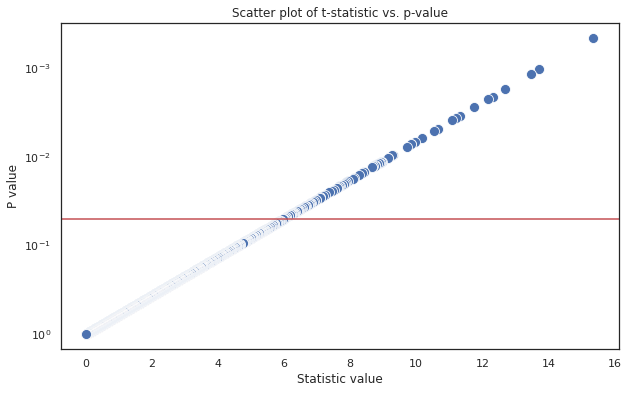

In [15]:
## Plotting

plt.figure(figsize=(8, 6), dpi=300) 
sns.set(style="white")  # Set the style
    
plt.figure(figsize=(10, 6))
sns.scatterplot(data=results_df, x='Statistic value', y='P value', palette='tab10', s=100)
plt.yscale('log')
plt.gca().invert_yaxis()  # This line will reverse the y-axis
    
plt.title('Scatter plot of t-statistic vs. p-value')
#plt.grid(True, which="both", ls="--", c='0.65')
    
plt.axhline(y=0.05, color='r', linestyle='-')
#plt.legend()
plt.show()
           

In [14]:
results_df["Statistic value" ] = results_df["Statistic value"].astype(float)
results_df["P value" ] = results_df["P value"].astype(float)
results_df = results_df.sort_values("P value", ascending=True)
results_df

,Label,Statistic value,P value,Test
759,Cytoplasm_Granularity_2_ER,15.351990,0.000464,Kruskal-Wallis
173,Cells_Granularity_2_ER,13.720488,0.001049,Kruskal-Wallis
1553,Nuclei_Texture_Contrast_RNA_3_0,13.472750,0.001187,Kruskal-Wallis
467,Cells_Texture_Gabor_AGP_10,12.688015,0.001757,Kruskal-Wallis
407,Cells_Texture_Correlation_AGP_10_0,12.309127,0.002124,Kruskal-Wallis
...,...,...,...,...
856,Cytoplasm_Intensity_StdIntensity_DNA,0.008327,0.995845,Kruskal-Wallis
960,Cytoplasm_Texture_AngularSecondMoment_Mito_3_0,0.008221,0.995898,Kruskal-Wallis
593,Cytoplasm_AreaShape_FormFactor,0.001870,0.999065,Kruskal-Wallis
1633,Nuclei_Texture_InfoMeas1_DNA_10_0,0.000575,0.999713,Kruskal-Wallis


In [16]:
results_df[results_df["P value"]<0.05][:20]

,Label,Statistic value,P value,Test
759,Cytoplasm_Granularity_2_ER,15.351990,0.000464,Kruskal-Wallis
173,Cells_Granularity_2_ER,13.720488,0.001049,Kruskal-Wallis
1553,Nuclei_Texture_Contrast_RNA_3_0,13.472750,0.001187,Kruskal-Wallis
467,Cells_Texture_Gabor_AGP_10,12.688015,0.001757,Kruskal-Wallis
407,Cells_Texture_Correlation_AGP_10_0,12.309127,0.002124,Kruskal-Wallis
1560,Nuclei_Texture_Correlation_DNA_5_0,12.174873,0.002271,Kruskal-Wallis
1559,Nuclei_Texture_Correlation_DNA_3_0,11.755298,0.002801,Kruskal-Wallis
1583,Nuclei_Texture_DifferenceEntropy_RNA_3_0,11.331804,0.003462,Kruskal-Wallis
1598,Nuclei_Texture_DifferenceVariance_RNA_3_0,11.205220,0.003688,Kruskal-Wallis
1629,Nuclei_Texture_Gabor_RNA_5,11.092196,0.003903,Kruskal-Wallis


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency

# Set a colorblind-friendly palette
colors = sns.color_palette("colorblind")
results = []

for label in CP.columns[1:]:
    
    # 1. Visualization

    # Set a colorblind-friendly palette
    colors = sns.color_palette("colorblind")
    # Create a bar plot
    #plt.figure(figsize=(4, 4), dpi=100)
    #sns.set(style="white")  # Set the style

    #ax = sns.barplot(x="DICT _ Concern", y=label, data=df, ci=None, palette=colors)

    # Set labels and title
    print(f'Proportion of {label}')
    #ax.set_ylabel(f'Proportion of {label}', fontsize=12)
    #ax.set_xlabel('DICT_class', fontsize=12)
    #ax.set_title(f'Proportion of {label} across DICT_class', fontsize=14)

    # Remove box line, set y-axis on the left
    #ax.spines['top'].set_visible(False)
    #ax.spines['right'].set_visible(False)
    #ax.spines['left'].set_position(('outward', 10))
    #ax.yaxis.set_ticks_position('left')

    #plt.show()

    # 2.Tests


    group1 = merged_df[merged_df["DICTrank"] == 0][label]
    group2 = merged_df[merged_df["DICTrank"] == 1][label]
        
    # Perform the Mann-Whitney U test
    try:
        u_stat, p = mannwhitneyu(group1, group2)
    except:
        continue
    results.append({
            'Label': label,
            'Proportion': merged_df[label].mean(),
            'Test': 'Mann-Whitney U',
            'Statistic value': u_stat,
            'P value': p
        })

results_df = pd.DataFrame(results)
results_df

Proportion of Cells_AreaShape_Area
Proportion of Cells_AreaShape_Center_X
Proportion of Cells_AreaShape_Center_Y
Proportion of Cells_AreaShape_Compactness
Proportion of Cells_AreaShape_Eccentricity
Proportion of Cells_AreaShape_Extent
Proportion of Cells_AreaShape_FormFactor
Proportion of Cells_AreaShape_MajorAxisLength
Proportion of Cells_AreaShape_MaxFeretDiameter
Proportion of Cells_AreaShape_MaximumRadius
Proportion of Cells_AreaShape_MeanRadius
Proportion of Cells_AreaShape_MedianRadius
Proportion of Cells_AreaShape_MinFeretDiameter
Proportion of Cells_AreaShape_MinorAxisLength
Proportion of Cells_AreaShape_Orientation
Proportion of Cells_AreaShape_Perimeter
Proportion of Cells_AreaShape_Solidity
Proportion of Cells_AreaShape_Zernike_0_0
Proportion of Cells_AreaShape_Zernike_1_1
Proportion of Cells_AreaShape_Zernike_2_0
Proportion of Cells_AreaShape_Zernike_2_2
Proportion of Cells_AreaShape_Zernike_3_1
Proportion of Cells_AreaShape_Zernike_3_3
Proportion of Cells_AreaShape_Zernike

Proportion of Cells_Intensity_MaxIntensity_RNA
Proportion of Cells_Intensity_MeanIntensityEdge_AGP
Proportion of Cells_Intensity_MeanIntensityEdge_DNA
Proportion of Cells_Intensity_MeanIntensityEdge_ER
Proportion of Cells_Intensity_MeanIntensityEdge_Mito
Proportion of Cells_Intensity_MeanIntensityEdge_RNA
Proportion of Cells_Intensity_MeanIntensity_AGP
Proportion of Cells_Intensity_MeanIntensity_DNA
Proportion of Cells_Intensity_MeanIntensity_ER
Proportion of Cells_Intensity_MeanIntensity_Mito
Proportion of Cells_Intensity_MeanIntensity_RNA
Proportion of Cells_Intensity_MedianIntensity_AGP
Proportion of Cells_Intensity_MedianIntensity_DNA
Proportion of Cells_Intensity_MedianIntensity_ER
Proportion of Cells_Intensity_MedianIntensity_Mito
Proportion of Cells_Intensity_MedianIntensity_RNA
Proportion of Cells_Intensity_MinIntensityEdge_AGP
Proportion of Cells_Intensity_MinIntensityEdge_DNA
Proportion of Cells_Intensity_MinIntensityEdge_ER
Proportion of Cells_Intensity_MinIntensityEdge_Mito

Proportion of Cells_Texture_InfoMeas1_AGP_10_0
Proportion of Cells_Texture_InfoMeas1_AGP_3_0
Proportion of Cells_Texture_InfoMeas1_AGP_5_0
Proportion of Cells_Texture_InfoMeas1_DNA_10_0
Proportion of Cells_Texture_InfoMeas1_DNA_3_0
Proportion of Cells_Texture_InfoMeas1_DNA_5_0
Proportion of Cells_Texture_InfoMeas1_ER_10_0
Proportion of Cells_Texture_InfoMeas1_ER_3_0
Proportion of Cells_Texture_InfoMeas1_ER_5_0
Proportion of Cells_Texture_InfoMeas1_Mito_10_0
Proportion of Cells_Texture_InfoMeas1_Mito_3_0
Proportion of Cells_Texture_InfoMeas1_Mito_5_0
Proportion of Cells_Texture_InfoMeas1_RNA_10_0
Proportion of Cells_Texture_InfoMeas1_RNA_3_0
Proportion of Cells_Texture_InfoMeas1_RNA_5_0
Proportion of Cells_Texture_InfoMeas2_AGP_10_0
Proportion of Cells_Texture_InfoMeas2_AGP_3_0
Proportion of Cells_Texture_InfoMeas2_AGP_5_0
Proportion of Cells_Texture_InfoMeas2_DNA_10_0
Proportion of Cells_Texture_InfoMeas2_DNA_3_0
Proportion of Cells_Texture_InfoMeas2_DNA_5_0
Proportion of Cells_Texture

Proportion of Cytoplasm_Correlation_RWC_Mito_AGP
Proportion of Cytoplasm_Correlation_RWC_Mito_DNA
Proportion of Cytoplasm_Correlation_RWC_Mito_ER
Proportion of Cytoplasm_Correlation_RWC_Mito_RNA
Proportion of Cytoplasm_Correlation_RWC_RNA_AGP
Proportion of Cytoplasm_Correlation_RWC_RNA_DNA
Proportion of Cytoplasm_Correlation_RWC_RNA_ER
Proportion of Cytoplasm_Correlation_RWC_RNA_Mito
Proportion of Cytoplasm_Granularity_10_AGP
Proportion of Cytoplasm_Granularity_10_ER
Proportion of Cytoplasm_Granularity_10_Mito
Proportion of Cytoplasm_Granularity_10_RNA
Proportion of Cytoplasm_Granularity_11_AGP
Proportion of Cytoplasm_Granularity_11_ER
Proportion of Cytoplasm_Granularity_11_Mito
Proportion of Cytoplasm_Granularity_11_RNA
Proportion of Cytoplasm_Granularity_12_AGP
Proportion of Cytoplasm_Granularity_12_ER
Proportion of Cytoplasm_Granularity_12_Mito
Proportion of Cytoplasm_Granularity_12_RNA
Proportion of Cytoplasm_Granularity_13_AGP
Proportion of Cytoplasm_Granularity_13_ER
Proportion o

Proportion of Cytoplasm_Texture_AngularSecondMoment_RNA_10_0
Proportion of Cytoplasm_Texture_AngularSecondMoment_RNA_3_0
Proportion of Cytoplasm_Texture_AngularSecondMoment_RNA_5_0
Proportion of Cytoplasm_Texture_Contrast_AGP_10_0
Proportion of Cytoplasm_Texture_Contrast_AGP_3_0
Proportion of Cytoplasm_Texture_Contrast_AGP_5_0
Proportion of Cytoplasm_Texture_Contrast_DNA_10_0
Proportion of Cytoplasm_Texture_Contrast_DNA_3_0
Proportion of Cytoplasm_Texture_Contrast_DNA_5_0
Proportion of Cytoplasm_Texture_Contrast_ER_10_0
Proportion of Cytoplasm_Texture_Contrast_ER_3_0
Proportion of Cytoplasm_Texture_Contrast_ER_5_0
Proportion of Cytoplasm_Texture_Contrast_Mito_10_0
Proportion of Cytoplasm_Texture_Contrast_Mito_3_0
Proportion of Cytoplasm_Texture_Contrast_Mito_5_0
Proportion of Cytoplasm_Texture_Contrast_RNA_10_0
Proportion of Cytoplasm_Texture_Contrast_RNA_3_0
Proportion of Cytoplasm_Texture_Contrast_RNA_5_0
Proportion of Cytoplasm_Texture_Correlation_AGP_10_0
Proportion of Cytoplasm_Te

Proportion of Nuclei_AreaShape_Zernike_9_7
Proportion of Nuclei_AreaShape_Zernike_9_9
Proportion of Nuclei_Correlation_Correlation_DNA_AGP
Proportion of Nuclei_Correlation_Correlation_DNA_ER
Proportion of Nuclei_Correlation_Correlation_DNA_Mito
Proportion of Nuclei_Correlation_Correlation_DNA_RNA
Proportion of Nuclei_Correlation_Correlation_ER_AGP
Proportion of Nuclei_Correlation_Correlation_ER_RNA
Proportion of Nuclei_Correlation_Correlation_Mito_AGP
Proportion of Nuclei_Correlation_Correlation_Mito_ER
Proportion of Nuclei_Correlation_Correlation_Mito_RNA
Proportion of Nuclei_Correlation_Correlation_RNA_AGP
Proportion of Nuclei_Correlation_Costes_AGP_DNA
Proportion of Nuclei_Correlation_Costes_AGP_ER
Proportion of Nuclei_Correlation_Costes_AGP_Mito
Proportion of Nuclei_Correlation_Costes_AGP_RNA
Proportion of Nuclei_Correlation_Costes_DNA_AGP
Proportion of Nuclei_Correlation_Costes_DNA_ER
Proportion of Nuclei_Correlation_Costes_DNA_Mito
Proportion of Nuclei_Correlation_Costes_DNA_RNA


Proportion of Nuclei_Intensity_UpperQuartileIntensity_AGP
Proportion of Nuclei_Intensity_UpperQuartileIntensity_DNA
Proportion of Nuclei_Intensity_UpperQuartileIntensity_ER
Proportion of Nuclei_Intensity_UpperQuartileIntensity_Mito
Proportion of Nuclei_Intensity_UpperQuartileIntensity_RNA
Proportion of Nuclei_Location_CenterMassIntensity_X_AGP
Proportion of Nuclei_Location_CenterMassIntensity_X_DNA
Proportion of Nuclei_Location_CenterMassIntensity_X_ER
Proportion of Nuclei_Location_CenterMassIntensity_X_Mito
Proportion of Nuclei_Location_CenterMassIntensity_X_RNA
Proportion of Nuclei_Location_CenterMassIntensity_Y_AGP
Proportion of Nuclei_Location_CenterMassIntensity_Y_DNA
Proportion of Nuclei_Location_CenterMassIntensity_Y_ER
Proportion of Nuclei_Location_CenterMassIntensity_Y_Mito
Proportion of Nuclei_Location_CenterMassIntensity_Y_RNA
Proportion of Nuclei_Location_Center_X
Proportion of Nuclei_Location_Center_Y
Proportion of Nuclei_Location_MaxIntensity_X_AGP
Proportion of Nuclei_Lo

Proportion of Nuclei_Texture_InverseDifferenceMoment_RNA_5_0
Proportion of Nuclei_Texture_SumAverage_AGP_10_0
Proportion of Nuclei_Texture_SumAverage_AGP_3_0
Proportion of Nuclei_Texture_SumAverage_AGP_5_0
Proportion of Nuclei_Texture_SumAverage_DNA_10_0
Proportion of Nuclei_Texture_SumAverage_DNA_3_0
Proportion of Nuclei_Texture_SumAverage_DNA_5_0
Proportion of Nuclei_Texture_SumAverage_ER_10_0
Proportion of Nuclei_Texture_SumAverage_ER_3_0
Proportion of Nuclei_Texture_SumAverage_ER_5_0
Proportion of Nuclei_Texture_SumAverage_Mito_10_0
Proportion of Nuclei_Texture_SumAverage_Mito_3_0
Proportion of Nuclei_Texture_SumAverage_Mito_5_0
Proportion of Nuclei_Texture_SumAverage_RNA_10_0
Proportion of Nuclei_Texture_SumAverage_RNA_3_0
Proportion of Nuclei_Texture_SumAverage_RNA_5_0
Proportion of Nuclei_Texture_SumEntropy_AGP_10_0
Proportion of Nuclei_Texture_SumEntropy_AGP_3_0
Proportion of Nuclei_Texture_SumEntropy_AGP_5_0
Proportion of Nuclei_Texture_SumEntropy_DNA_10_0
Proportion of Nuclei

,Label,Proportion,Test,Statistic value,P value
0,Cells_AreaShape_Area,53.657002,Mann-Whitney U,4655.0,0.729632
1,Cells_AreaShape_Center_X,3.813686,Mann-Whitney U,4933.0,0.813151
2,Cells_AreaShape_Center_Y,0.369180,Mann-Whitney U,5911.5,0.021894
3,Cells_AreaShape_Compactness,0.010532,Mann-Whitney U,4370.0,0.344964
4,Cells_AreaShape_Eccentricity,0.004954,Mann-Whitney U,4279.0,0.256126
...,...,...,...,...,...
1767,Nuclei_Texture_Variance_Mito_3_0,-0.028410,Mann-Whitney U,5137.0,0.506070
1768,Nuclei_Texture_Variance_Mito_5_0,-0.025667,Mann-Whitney U,5149.0,0.490080
1769,Nuclei_Texture_Variance_RNA_10_0,-0.029412,Mann-Whitney U,5115.0,0.536083
1770,Nuclei_Texture_Variance_RNA_3_0,-0.025888,Mann-Whitney U,5371.0,0.247434


In [18]:
results_df["Statistic value" ] = results_df["Statistic value"].astype(float)
results_df = results_df.sort_values("Statistic value", ascending=False)
results_df

,Label,Proportion,Test,Statistic value,P value
1597,Nuclei_Texture_Correlation_DNA_5_0,-0.007269,Mann-Whitney U,6270.0,0.002324
1596,Nuclei_Texture_Correlation_DNA_3_0,-0.009259,Mann-Whitney U,6222.0,0.003234
1225,Nuclei_Correlation_Correlation_DNA_ER,-0.003466,Mann-Whitney U,6164.0,0.004762
1373,Nuclei_Granularity_5_DNA,-0.168082,Mann-Whitney U,6130.0,0.005936
1328,Nuclei_Granularity_12_DNA,-0.017956,Mann-Whitney U,6112.0,0.006657
...,...,...,...,...,...
1636,Nuclei_Texture_DifferenceVariance_RNA_5_0,0.001170,Mann-Whitney U,3499.0,0.005531
1635,Nuclei_Texture_DifferenceVariance_RNA_3_0,0.001809,Mann-Whitney U,3482.0,0.004953
1634,Nuclei_Texture_DifferenceVariance_RNA_10_0,-0.007003,Mann-Whitney U,3427.0,0.003437
1620,Nuclei_Texture_DifferenceEntropy_RNA_3_0,-0.000109,Mann-Whitney U,3403.0,0.002920


<Figure size 2400x1800 with 0 Axes>

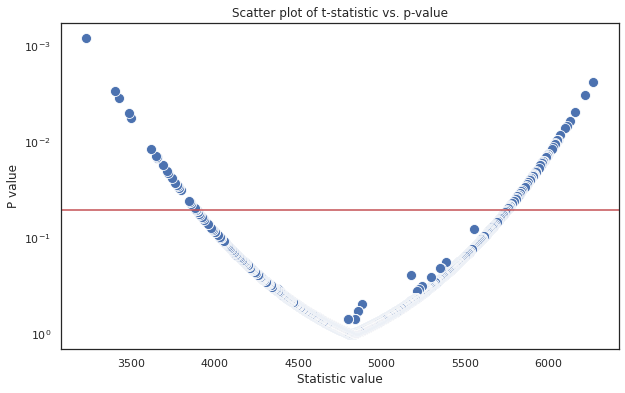

In [20]:
## Plotting

plt.figure(figsize=(8, 6), dpi=300) 
sns.set(style="white")  # Set the style
    
plt.figure(figsize=(10, 6))
sns.scatterplot(data=results_df, x='Statistic value', y='P value', palette='tab10', s=100)
plt.yscale('log')
plt.gca().invert_yaxis()  # This line will reverse the y-axis
    
plt.title('Scatter plot of t-statistic vs. p-value')
#plt.grid(True, which="both", ls="--", c='0.65')
    
plt.axhline(y=0.05, color='r', linestyle='-')
#plt.legend()
plt.show()
           

In [21]:
results_df[results_df["P value"]<0.05]

,Label,Proportion,Test,Statistic value,P value
1597,Nuclei_Texture_Correlation_DNA_5_0,-0.007269,Mann-Whitney U,6270.0,0.002324
1596,Nuclei_Texture_Correlation_DNA_3_0,-0.009259,Mann-Whitney U,6222.0,0.003234
1225,Nuclei_Correlation_Correlation_DNA_ER,-0.003466,Mann-Whitney U,6164.0,0.004762
1373,Nuclei_Granularity_5_DNA,-0.168082,Mann-Whitney U,6130.0,0.005936
1328,Nuclei_Granularity_12_DNA,-0.017956,Mann-Whitney U,6112.0,0.006657
...,...,...,...,...,...
1636,Nuclei_Texture_DifferenceVariance_RNA_5_0,0.001170,Mann-Whitney U,3499.0,0.005531
1635,Nuclei_Texture_DifferenceVariance_RNA_3_0,0.001809,Mann-Whitney U,3482.0,0.004953
1634,Nuclei_Texture_DifferenceVariance_RNA_10_0,-0.007003,Mann-Whitney U,3427.0,0.003437
1620,Nuclei_Texture_DifferenceEntropy_RNA_3_0,-0.000109,Mann-Whitney U,3403.0,0.002920
